## EDA
### Visualize 5 NORMAL vs 5 PNEUMONIA

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


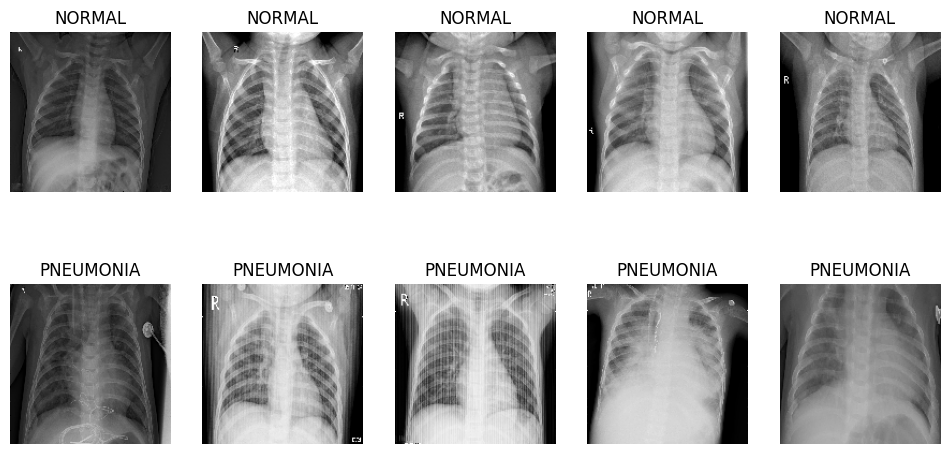

In [21]:
import os
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

base_path = "/kaggle/input/chest-xray-pneumonia/chest_xray/train"

normal_images = os.listdir(os.path.join(base_path, "NORMAL"))
pneumonia_images = os.listdir(os.path.join(base_path, "PNEUMONIA"))

plt.figure(figsize=(12,6))

for i in range(5):
    img = load_img(os.path.join(base_path, "NORMAL", normal_images[i]), target_size=(150,150))
    plt.subplot(2,5,i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title("NORMAL")

for i in range(5):
    img = load_img(os.path.join(base_path, "PNEUMONIA", pneumonia_images[i]), target_size=(150,150))
    plt.subplot(2,5,i+6)
    plt.imshow(img)
    plt.axis("off")
    plt.title("PNEUMONIA")

plt.show()

## Preprocessing & Data Generators

### Image Resize → 150×150

### Normalize → [0,1]

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.1,
    horizontal_flip=True
)

val_test_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(
    "/kaggle/input/chest-xray-pneumonia/chest_xray/train",
    target_size=(150,150),
    batch_size=32,
    class_mode="binary"
)

val_data = val_test_gen.flow_from_directory(
    "/kaggle/input/chest-xray-pneumonia/chest_xray/val",
    target_size=(150,150),
    batch_size=32,
    class_mode="binary"
)

test_data = val_test_gen.flow_from_directory(
    "/kaggle/input/chest-xray-pneumonia/chest_xray/test",
    target_size=(150,150),
    batch_size=32,
    class_mode="binary",
    shuffle=False
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


## Cnn implementation 

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Input(shape=(150,150,3)),

    Conv2D(32, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation="relu"),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")
])

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [9]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

## training the model 

In [10]:
history = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 197s 1s/step - accuracy: 0.7334 - loss: 0.6109 - val_accuracy: 0.6250 - val_loss: 0.9623
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 164s 1s/step - accuracy: 0.8625 - loss: 0.3088 - val_accuracy: 0.6250 - val_loss: 0.8296
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 165s 1s/step - accuracy: 0.8878 - loss: 0.2614 - val_accuracy: 0.7500 - val_loss: 0.7771
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 166s 1s/step - accuracy: 0.9156 - loss: 0.2176 - val_accuracy: 0.5625 - val_loss: 1.5688
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 167s 1s/step - accuracy: 0.9131 - loss: 0.2243 - val_accuracy: 0.6875 - val_loss: 0.6409
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 165s 1s/step - accuracy: 0.9117 - loss: 0.2235 - val_accuracy: 0.6250 - val_loss: 0.7540
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 165s 1s/step - accuracy: 0.9365 - loss: 0.1814 - val_accuracy: 0.6250 - val_loss: 0.9473
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 165s 1s/step - accuracy: 0.9286 - loss: 0.1792 - val_accu

##  Evaluation with Confusion Matrix

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 584ms/step


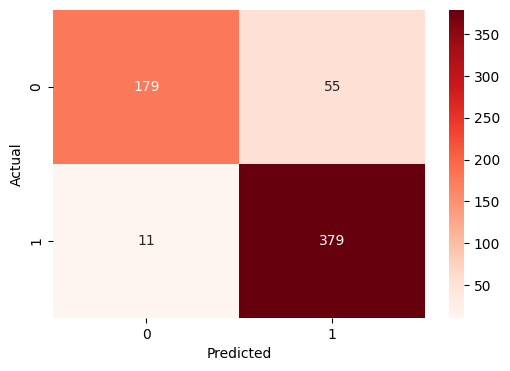

              precision    recall  f1-score   support

      NORMAL       0.94      0.76      0.84       234
   PNEUMONIA       0.87      0.97      0.92       390

    accuracy                           0.89       624
   macro avg       0.91      0.87      0.88       624
weighted avg       0.90      0.89      0.89       624



In [11]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_true = test_data.classes
y_pred = model.predict(test_data)
y_pred = (y_pred > 0.5).astype(int)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(y_true, y_pred, target_names=["NORMAL","PNEUMONIA"]))

## ROC Curve + AUC Score

20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 419ms/step


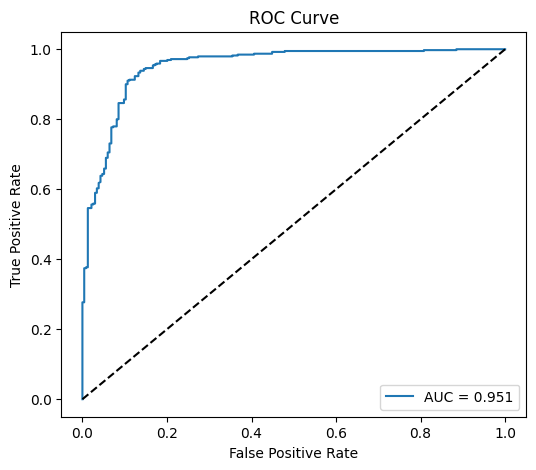

In [12]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob = model.predict(test_data).ravel()

fpr, tpr, thresholds = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

## ROC Curve Analysis

### Receiver Operating Characteristic (ROC)

The Receiver Operating Characteristic (ROC) curve evaluates the model’s ability to distinguish between **NORMAL** and **PNEUMONIA** chest X-ray images across different classification thresholds.

- The ROC curve shows a steep rise toward the top-left corner, indicating a high true positive rate with a low false positive rate.
- The model achieves an **Area Under the Curve (AUC) score of 0.951**, which reflects excellent discriminative capability.
- An AUC value close to 1.0 indicates strong class separability between healthy and pneumonia-affected lungs.

**Interpretation:**  
The high ROC-AUC score confirms that the proposed CNN model can reliably differentiate between normal and pneumonia chest X-ray images, making it suitable for pneumonia screening applications.

---

## Precision–Recall Curve

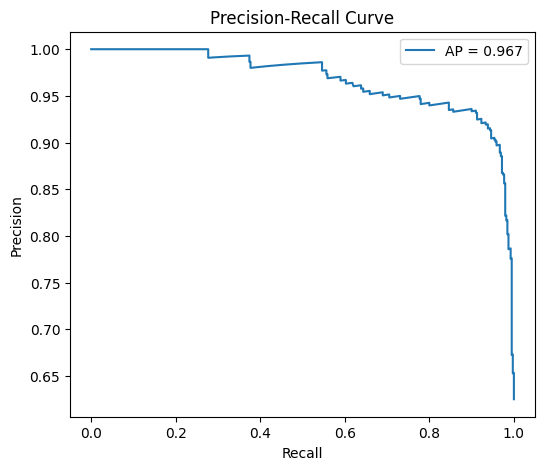

In [13]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, thresholds = precision_recall_curve(y_true, y_prob)
ap_score = average_precision_score(y_true, y_prob)

plt.figure(figsize=(6,5))
plt.plot(recall, precision, label=f"AP = {ap_score:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

## 📊 Precision–Recall Curve Analysis

### Precision–Recall Performance

The Precision–Recall (PR) curve is particularly important for medical diagnosis tasks, where datasets may be imbalanced and false negatives are critical.

- The Precision–Recall curve maintains high precision across a wide range of recall values.
- The model achieves an **Average Precision (AP) score of 0.967**, indicating strong performance on the positive (pneumonia) class.
- Precision decreases only when recall approaches its maximum value, reflecting a controlled trade-off between detecting all pneumonia cases and minimizing false positives.

**Interpretation:**  
The high Average Precision score demonstrates that the model is highly reliable in identifying pneumonia cases, making it well-suited for clinical screening scenarios where missing a positive case is more dangerous than generating a false alert.

## testing on External / Unseen Images



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


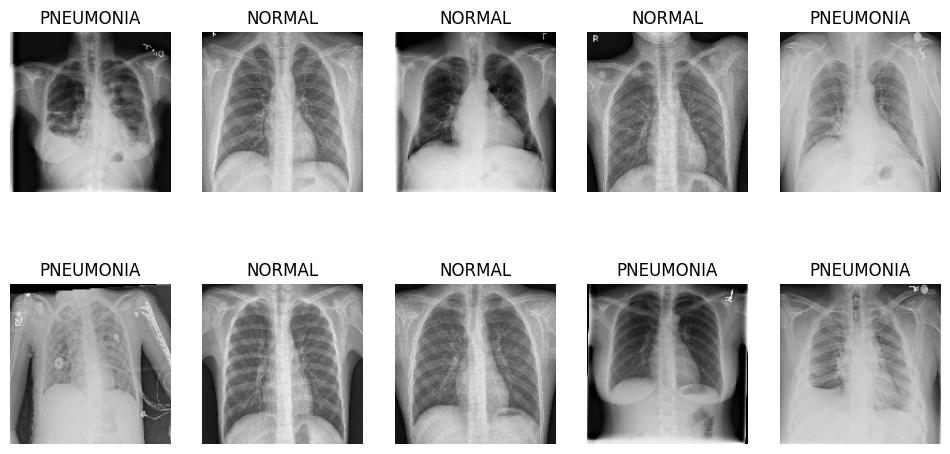

In [14]:
import glob
from tensorflow.keras.preprocessing.image import img_to_array

external_images = glob.glob("/kaggle/input/test-dataset-2/test/*")
sample_images = random.sample(external_images, 10)

plt.figure(figsize=(12,6))

for i, img_path in enumerate(sample_images):
    img = load_img(img_path, target_size=(150,150))
    arr = img_to_array(img)/255.0
    arr = np.expand_dims(arr, axis=0)

    pred = model.predict(arr)[0][0]
    label = "PNEUMONIA" if pred > 0.5 else "NORMAL"

    plt.subplot(2,5,i+1)
    plt.imshow(img)
    plt.title(label)
    plt.axis("off")

plt.show()

## for saving the ouptput and extra anylis 

In [16]:

output_dir = "/kaggle/working/external_results"
os.makedirs(output_dir, exist_ok=True)

In [17]:
import glob
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

external_images = glob.glob("/kaggle/input/test-dataset-2/test/*")
sample_images = random.sample(external_images, 10)

results = []

for idx, img_path in enumerate(sample_images):
    img = load_img(img_path, target_size=(150,150))
    arr = img_to_array(img) / 255.0
    arr = np.expand_dims(arr, axis=0)

    prob = model.predict(arr)[0][0]
    label = "PNEUMONIA" if prob > 0.5 else "NORMAL"

    plt.figure(figsize=(4,4))
    plt.imshow(img)
    plt.title(f"{label} | Confidence: {prob:.3f}")
    plt.axis("off")

    save_path = os.path.join(output_dir, f"result_{idx+1}.png")
    plt.savefig(save_path, bbox_inches="tight")
    plt.close()

    results.append({
        "image_name": os.path.basename(img_path),
        "predicted_label": label,
        "confidence_score": float(prob)
    })

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


In [18]:
df = pd.DataFrame(results)
csv_path = os.path.join(output_dir, "external_predictions.csv")
df.to_csv(csv_path, index=False)

df

,image_name,predicted_label,confidence_score
0,00024744_000.png,PNEUMONIA,0.788982
1,00006586_001.png,PNEUMONIA,0.622908
2,IM-0016-0001.jpeg,NORMAL,0.142441
3,00006592_000.png,PNEUMONIA,0.994692
4,00020945_054.png,PNEUMONIA,1.000000
5,00000001_000.png,NORMAL,0.453762
6,00024729_000.png,PNEUMONIA,0.954441
7,00006587_000.png,PNEUMONIA,0.944486
8,00024732_000.png,PNEUMONIA,0.998781
9,00006585_010.png,PNEUMONIA,0.814236


In [19]:
label_counts = df["predicted_label"].value_counts()
avg_confidence = df.groupby("predicted_label")["confidence_score"].mean()

label_counts, avg_confidence

(predicted_label
 PNEUMONIA    8
 NORMAL       2
 Name: count, dtype: int64,
 predicted_label
 NORMAL       0.298102
 PNEUMONIA    0.889816
 Name: confidence_score, dtype: float64)

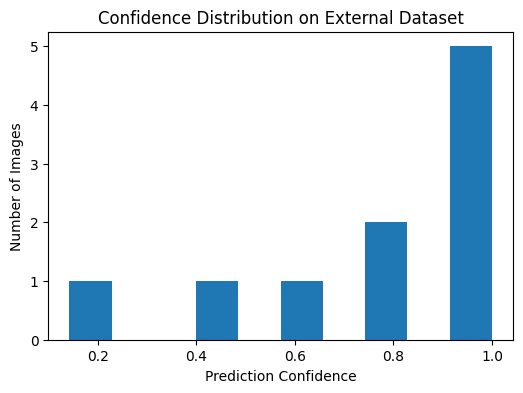

In [20]:
plt.figure(figsize=(6,4))
plt.hist(df["confidence_score"], bins=10)
plt.xlabel("Prediction Confidence")
plt.ylabel("Number of Images")
plt.title("Confidence Distribution on External Dataset")
plt.show()